In [1]:
import pyvista as pv
import numpy as np
from sklearn.neighbors import KDTree
from tqdm.auto import tqdm
import imageio
from PIL import Image

In [2]:
n_cells = 200
n_seeds = 200
thickness = 0.1

In [3]:
grid = pv.ImageData(dimensions=[n_cells]*3)

In [30]:
grid.bounds

(0.0, 199.0, 0.0, 199.0, 0.0, 199.0)

In [11]:
idx = np.random.choice(len(grid.points), n_seeds, replace=False)

In [12]:
seeds = grid.points[idx]

In [13]:
kdt = KDTree(seeds)

In [17]:
dd, ii = kdt.query(grid.points, k=2)

In [18]:
diff_rel = (dd[:,1] - dd[:,0]) / dd[:,1]

In [21]:
grid["lattice"] = np.zeros((len(grid.points), 1))
grid["lattice"][diff_rel < thickness] = 1

In [25]:
grid_thr = grid.threshold(value=0.5).extract_surface().smooth(n_iter=1000)
grid_thr.clear_data()

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


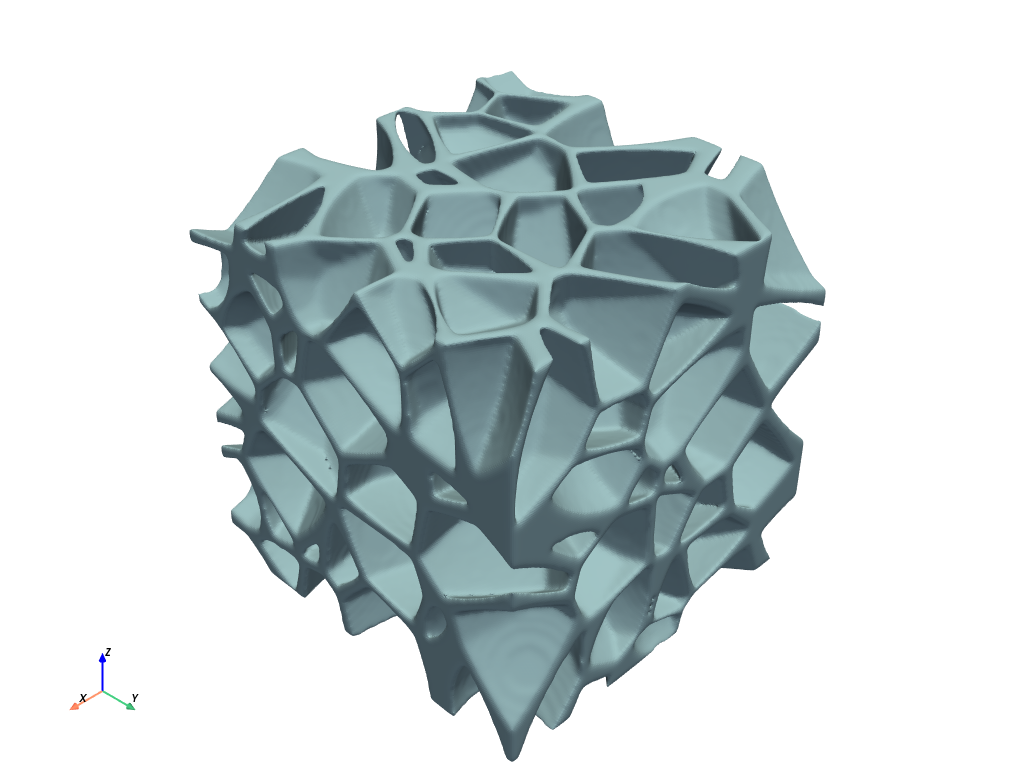

In [26]:
grid_thr.plot()

  0%|          | 0/20 [00:00<?, ?it/s]

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


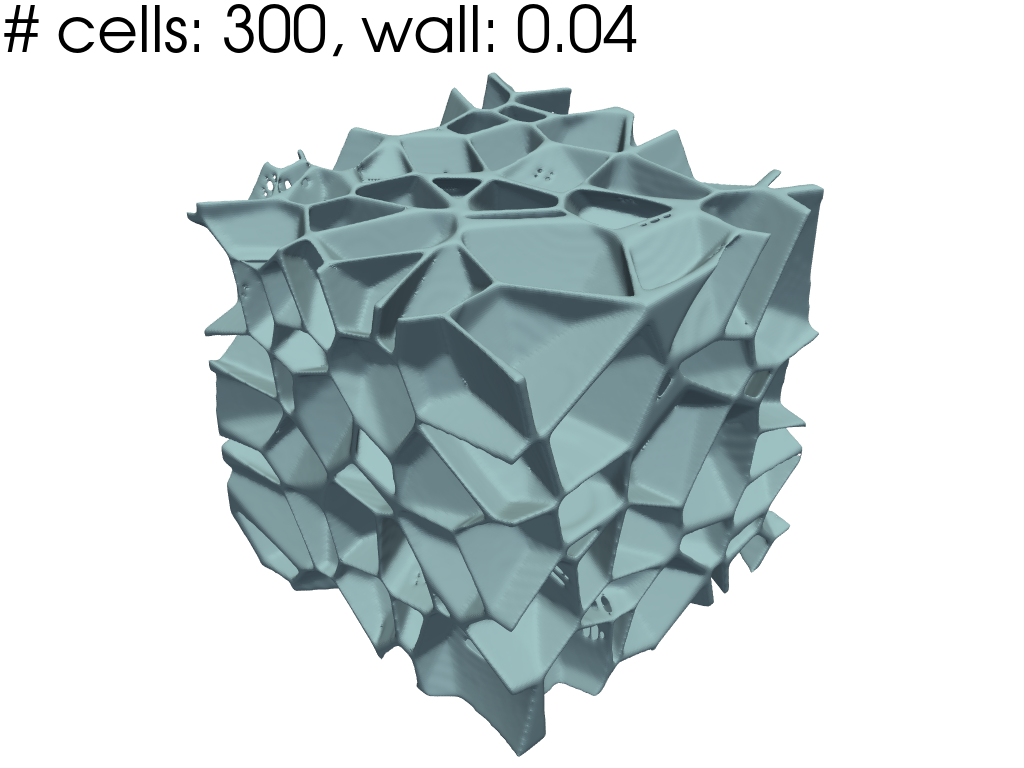

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


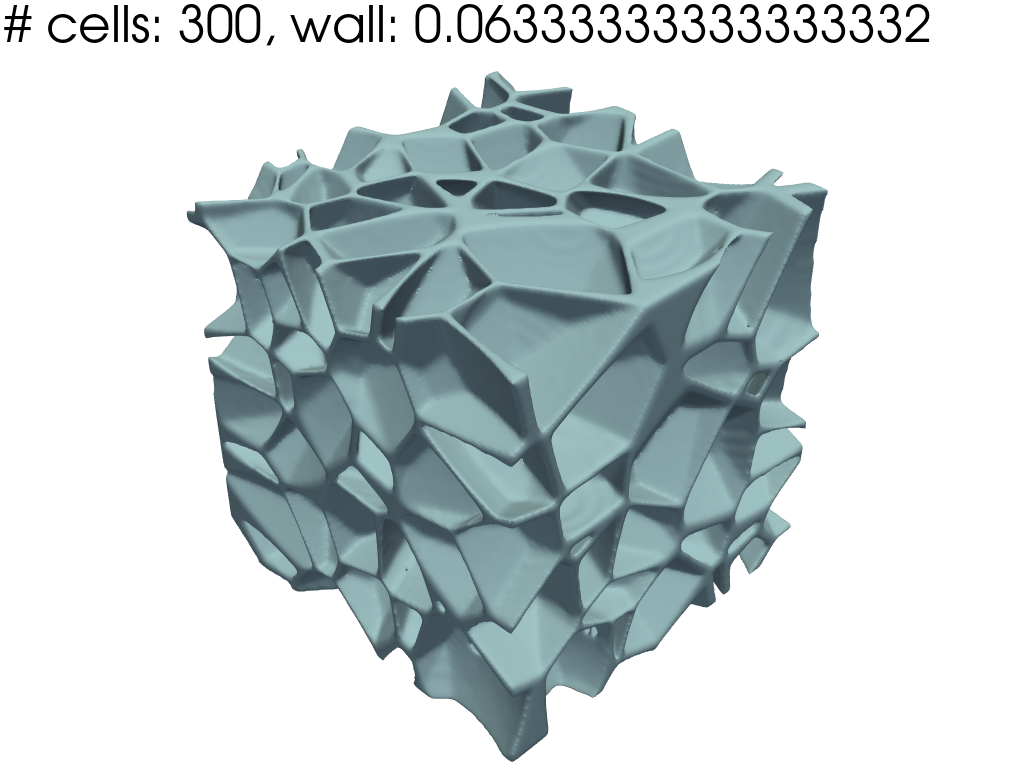

/home/max/miniconda3/envs/dev/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


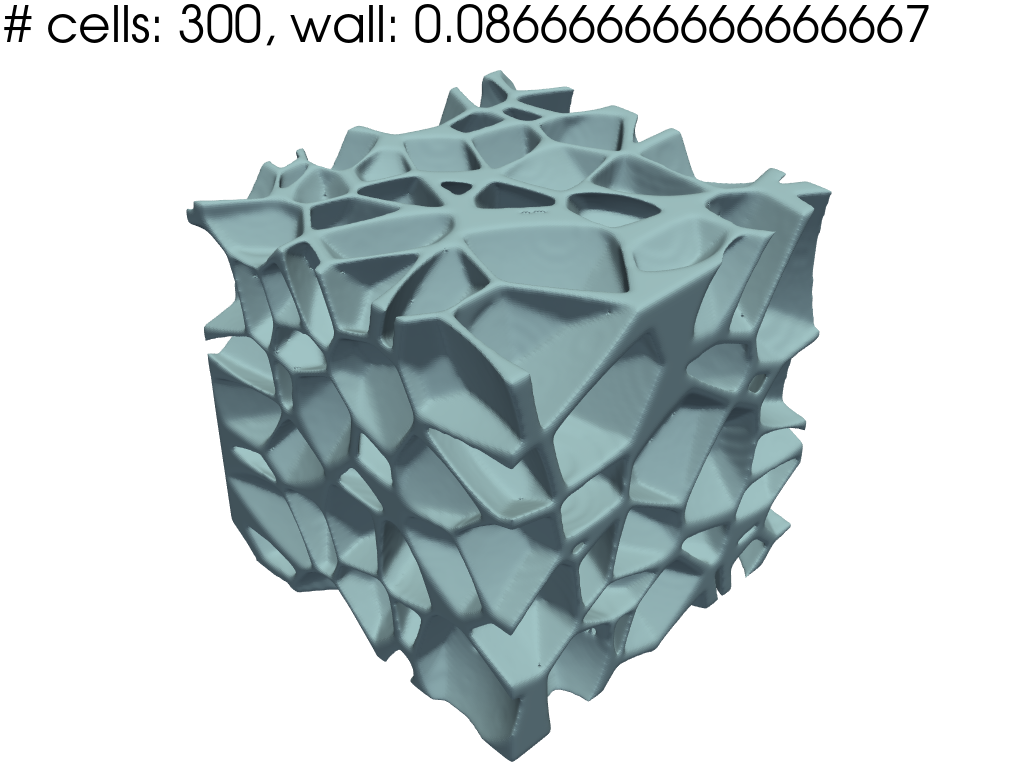

In [ ]:
n_seeds_list = [300, 500, 1000]
thicknesses = np.around(np.linspace(0.04, 0.25, 20), decimals=3)
images = []
with tqdm(total=len(n_seeds_list)*len(thicknesses)) as pbar:
    for n_seeds in n_seeds_list:
        idx = np.random.choice(len(grid.points), n_seeds, replace=False)
        seeds = grid.points[idx]
        kdt = KDTree(seeds)
        dd, ii = kdt.query(grid.points, k=2)
        for thickness in thicknesses:
            diff_rel = (dd[:,1] - dd[:,0]) / dd[:,1]
            grid["lattice"] = np.zeros((len(grid.points), 1))
            grid["lattice"][diff_rel < thickness] = 1
            lattice = grid.threshold(value=0.5).extract_surface().smooth(n_iter=1000)
            lattice.clear_data()
            p = pv.Plotter(off_screen=True)
            p.add_mesh(lattice)
            _ = p.add_text(
                f'# cells: {n_seeds}, wall: {thickness}',
                position='upper_left',
                color='black',
                shadow=False,
                font_size=26,
            )
            img = p.show(return_img=True)
            Image.fromarray(img).save(f"{n_seeds}_{thickness}.png")
            images.append(img)
            pbar.update(1)

In [ ]:
imageio.mimsave("voronoi_lattice.gif", images)